TCC - PUC - 2019.2

Participantes:
Dijalma Fardin Junior
João Roberto Zoghbi
Rodrigo Pandolfi Miranda

Objetivo: Identificar anomalias nos eventos de tempeatura e pressão dos permutadores do sistema de compressão de gás, de forma a evitar shutdown

Planejamento:
1) Obter os dados e tratá-los
2) Utilizar técnicas estatisticas para obter as anomalias com análises univariáveis
3) Utilizar técnicas estatisticas para obter as anomalias com análises multivariáveis
    3.1) PCA
    3.2) Mahalanobis
4) Utilizar técnicas de aprendizagem de máquina para obter as anomalias com análises multivariáveis
    4.1) Isolation Forest
    4.2) Local Outlier Factor
    4.3) SVM
    4.4) Autoencoder
5) Métricas e escolha do melhor modelo    




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss

1) Obter os dados e tratá-los

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
workdir_path = '/content/drive/My Drive/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


In [3]:
#Arquivo com os valores de data/Temperatura/Pressão/Classificação de anômalo ou não 
#A classficação de anômalo ou não foi feito manualmente a partir de um arquivo de perdas de produção
df = pd.read_csv("dados_entrada_permutador.csv",sep=";")
df.head()

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia
0,15/05/2017 00:00,"67,5702057","169,8499146","21,88606644","61,96791077","60838,55078",0.0
1,15/05/2017 00:01,"67,5946274","169,4202728","21,78266335","61,41078568","61253,11328",0.0
2,15/05/2017 00:02,"67,5900803","168,9943085","21,7167778","61,02445602","61544,19141",0.0
3,15/05/2017 00:03,"67,5611191","168,6232605","21,62524033","60,53781509","62890,96875",0.0
4,15/05/2017 00:04,"67,4969482","168,0438232","21,59707069","60,04884338","63825,34766",0.0


In [4]:
df_teste = pd.read_csv("dados_teste_permutador.csv",sep=";")
df_teste.head()

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia
0,10/01/2018 00:00,"51,41915512","170,428833","15,79490376","51,41915512","28006,4082",0
1,10/01/2018 00:01,"51,74056625","170,3824615","15,86073589","51,74056625","28182,73633",0
2,10/01/2018 00:02,"52,27955627","169,9375","15,90231991","52,27955627","30786,16797",0
3,10/01/2018 00:03,"52,92316437","170,2624969","15,95116043","52,92316437","32140,43359",0
4,10/01/2018 00:04,"54,4613533","170,1817932","16,50835991","54,4613533","33470,86328",0


In [5]:
#Transformando temperatura e pressão em um valor numérico
df["Temperatura_Entrada"]=df["Temperatura_Entrada"].str.replace(",",".")
df["Temperatura_Saida"]=df["Temperatura_Saida"].str.replace(",",".")
df["Pressao_Entrada"]=df["Pressao_Entrada"].str.replace(",",".")
df["Pressao_Saida"]=df["Pressao_Saida"].str.replace(",",".")
df["Vazao"]=df["Vazao"].str.replace(",",".")

df_teste["Temperatura_Entrada"]=df["Temperatura_Entrada"].str.replace(",",".")
df_teste["Temperatura_Saida"]=df["Temperatura_Saida"].str.replace(",",".")
df_teste["Pressao_Entrada"]=df["Pressao_Entrada"].str.replace(",",".")
df_teste["Pressao_Saida"]=df["Pressao_Saida"].str.replace(",",".")
df_teste["Vazao"]=df["Vazao"].str.replace(",",".")

df["Temperatura_Entrada"]=df["Temperatura_Entrada"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df["Temperatura_Saida"]=df["Temperatura_Saida"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df["Pressao_Entrada"]=df["Pressao_Entrada"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df["Pressao_Saida"]=df["Pressao_Saida"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df["Vazao"]=df["Vazao"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")

df_teste["Temperatura_Entrada"]=df["Temperatura_Entrada"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df_teste["Temperatura_Saida"]=df["Temperatura_Saida"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df_teste["Pressao_Entrada"]=df["Pressao_Entrada"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df_teste["Pressao_Saida"]=df["Pressao_Saida"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")
df_teste["Vazao"]=df["Vazao"].str.replace(",",".").replace("[-11057] Not Enough Values For Calculation","0").replace("[-11059] No Good Data For Calculation","0")

df["Temperatura_Entrada_Convertido"]=pd.to_numeric(df["Temperatura_Entrada"])
df["Temperatura_Saida_Convertido"]=pd.to_numeric(df["Temperatura_Saida"])
df["Pressao_Entrada_Convertido"]=pd.to_numeric(df["Pressao_Entrada"])
df["Pressao_Saida_Convertido"]=pd.to_numeric(df["Pressao_Saida"])
df["Vazao_Convertido"]=pd.to_numeric(df["Vazao"])

df_teste["Temperatura_Entrada_Convertido"]=pd.to_numeric(df["Temperatura_Entrada"])
df_teste["Temperatura_Saida_Convertido"]=pd.to_numeric(df["Temperatura_Saida"])
df_teste["Pressao_Entrada_Convertido"]=pd.to_numeric(df["Pressao_Entrada"])
df_teste["Pressao_Saida_Convertido"]=pd.to_numeric(df["Pressao_Saida"])
df_teste["Vazao_Convertido"]=pd.to_numeric(df["Vazao"])



In [6]:
import seaborn as sns

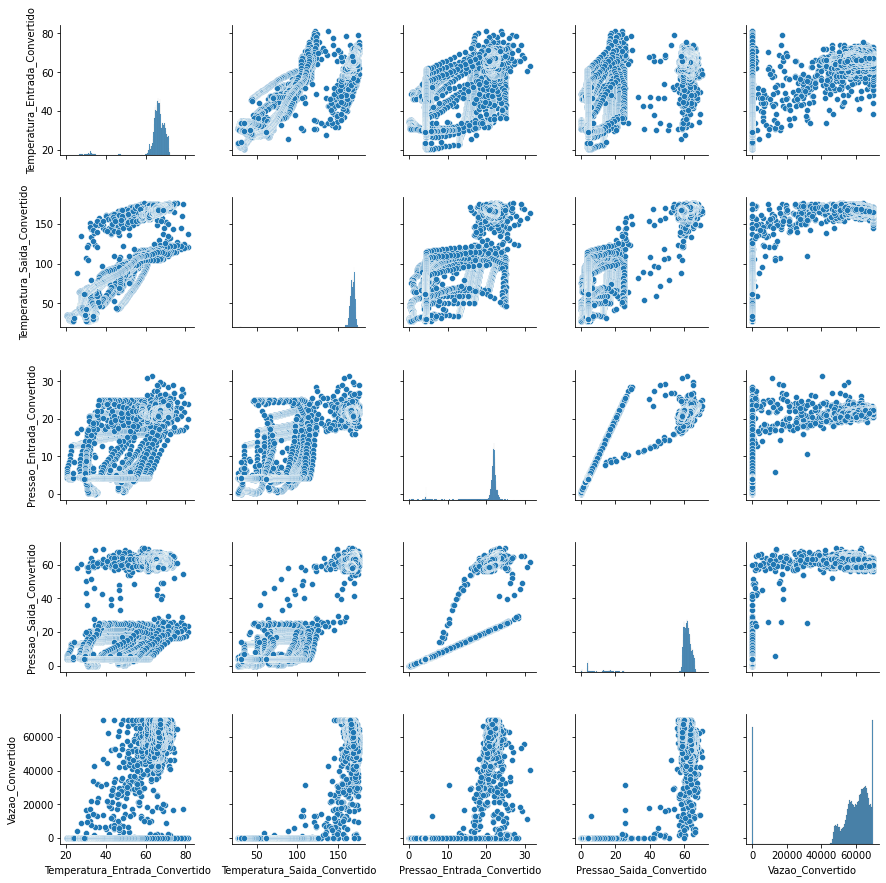

In [7]:
dfrelacao=df[["Temperatura_Entrada_Convertido","Temperatura_Saida_Convertido","Pressao_Entrada_Convertido","Pressao_Saida_Convertido","Vazao_Convertido"]]
sns.pairplot(data=dfrelacao)

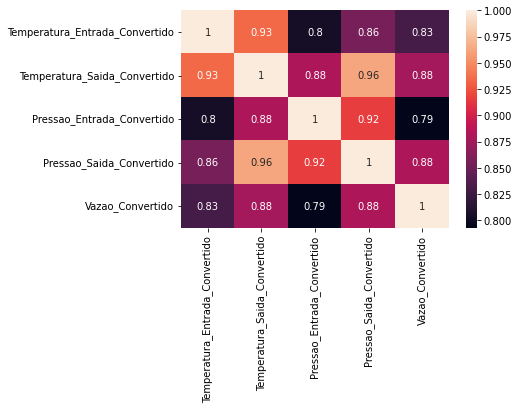

In [8]:
sns.heatmap(dfrelacao.corr(), annot=True)

In [9]:
print('Temperatura Entrada')
print(df['Temperatura_Entrada_Convertido'].describe())
print(df['Temperatura_Entrada_Convertido'])
print('')

print('Temperatura Saída')
print(df['Temperatura_Saida_Convertido'].describe())
print('')

print('Pressão Entrada')
print(df['Temperatura_Saida_Convertido'].describe())
print('')

print('Pressão Saída')
print(df['Pressao_Saida_Convertido'].describe())
print('')

print('Vazão')
print(df['Vazao_Convertido'].describe())
print('')


Temperatura Entrada
count    46080.000000
mean        64.929772
std          7.998370
min         20.360046
25%         64.838749
50%         66.489742
75%         68.547012
max         81.074486
Name: Temperatura_Entrada_Convertido, dtype: float64
0        67.570206
1        67.594627
2        67.590080
3        67.561119
4        67.496948
           ...    
46075    29.494579
46076    29.460350
46077    29.426130
46078    29.411499
46079    29.362659
Name: Temperatura_Entrada_Convertido, Length: 46080, dtype: float64

Temperatura Saída
count    46080.000000
mean       160.907360
std         27.138599
min         26.904638
25%        165.778530
50%        168.061119
75%        170.168747
max        175.981247
Name: Temperatura_Saida_Convertido, dtype: float64

Pressão Entrada
count    46080.000000
mean       160.907360
std         27.138599
min         26.904638
25%        165.778530
50%        168.061119
75%        170.168747
max        175.981247
Name: Temperatura_Saida_Convertido,

Conclusões: Desvio padrão muito alto é devido a momentos onde a máquina não está operando. Iremos aplicar um envelope operacional nos dados (limites onde está garantido que a máquina está funcionando) para trabalharmos apenas com dados de máquina operacional

In [10]:
#Envelope baseado no alarme de valor mínimo (características do domínio do problema)
df_comenvelope = df[(df["Temperatura_Saida_Convertido"]>150)]
df_comenvelope = df_comenvelope[(df_comenvelope["Temperatura_Entrada_Convertido"]>40)]
df_comenvelope = df_comenvelope[(df_comenvelope["Pressao_Entrada_Convertido"]>15)]
df_comenvelope = df_comenvelope[(df_comenvelope["Pressao_Saida_Convertido"]>15)]
df_comenvelope

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido,Vazao_Convertido
0,15/05/2017 00:00,67.5702057,169.8499146,21.88606644,61.96791077,60838.55078,0.0,67.570206,169.849915,21.886066,61.967911,60838.55078
1,15/05/2017 00:01,67.5946274,169.4202728,21.78266335,61.41078568,61253.11328,0.0,67.594627,169.420273,21.782663,61.410786,61253.11328
2,15/05/2017 00:02,67.5900803,168.9943085,21.7167778,61.02445602,61544.19141,0.0,67.590080,168.994308,21.716778,61.024456,61544.19141
3,15/05/2017 00:03,67.5611191,168.6232605,21.62524033,60.53781509,62890.96875,0.0,67.561119,168.623260,21.625240,60.537815,62890.96875
4,15/05/2017 00:04,67.4969482,168.0438232,21.59707069,60.04884338,63825.34766,0.0,67.496948,168.043823,21.597071,60.048843,63825.34766
...,...,...,...,...,...,...,...,...,...,...,...,...
45851,15/06/2017 20:11,66.6960831,168.3062439,20.95238113,58.68132019,61161.33203,0.0,66.696083,168.306244,20.952381,58.681320,61161.33203
45852,15/06/2017 20:12,66.5251312,168.6187439,20.5511837,58.52051544,60145.41016,0.0,66.525131,168.618744,20.551184,58.520515,60145.41016
45853,15/06/2017 20:13,66.1783752,168.4802094,20.90354156,58.53480148,62762,0.0,66.178375,168.480209,20.903542,58.534801,62762.00000
45854,15/06/2017 20:14,65.9733353,168.2375031,20.72014999,58.34460449,54609.46484,0.0,65.973335,168.237503,20.720150,58.344604,54609.46484


In [11]:
print('Temperatura Entrada')
print(df_comenvelope['Temperatura_Entrada_Convertido'].describe())
print('')

print('Temperatura Saída')
print(df_comenvelope['Temperatura_Saida_Convertido'].describe())
print('')

print('Pressão Entrada')
print(df_comenvelope['Temperatura_Saida_Convertido'].describe())
print('')

print('Pressão Saída')
print(df_comenvelope['Pressao_Saida_Convertido'].describe())
print('')

print('Vazão')
print(df_comenvelope['Vazao_Convertido'].describe())
print('')

Temperatura Entrada
count    42726.000000
mean        66.860027
std          2.592675
min         40.271278
25%         65.211275
50%         66.713680
75%         68.723465
max         78.879479
Name: Temperatura_Entrada_Convertido, dtype: float64

Temperatura Saída
count    42726.000000
mean       168.168638
std          2.805396
min        150.013534
25%        166.381256
50%        168.425156
75%        170.288055
max        175.981247
Name: Temperatura_Saida_Convertido, dtype: float64

Pressão Entrada
count    42726.000000
mean       168.168638
std          2.805396
min        150.013534
25%        166.381256
50%        168.425156
75%        170.288055
max        175.981247
Name: Temperatura_Saida_Convertido, dtype: float64

Pressão Saída
count    42726.000000
mean        61.808479
std          1.955885
min         25.815498
25%         60.263392
50%         61.660564
75%         63.125767
max         70.036629
Name: Pressao_Saida_Convertido, dtype: float64

Vazão
count    42726.0

2) Utilizar técnicas estatisticas para obter as anomalias com análises univariáveis

In [12]:
#Cálculo do ZScore da temperatura - exemplo para verificar a técnica
zscore_rate = ss.zscore(df_comenvelope['Temperatura_Saida_Convertido'], ddof=0)
df_comenvelope = df_comenvelope.assign(zscore_temperatura=zscore_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


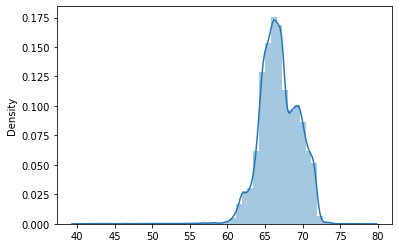

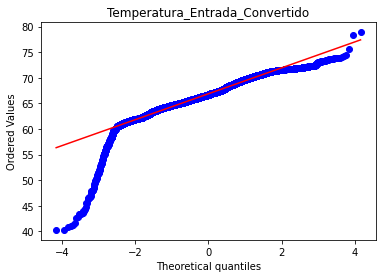

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


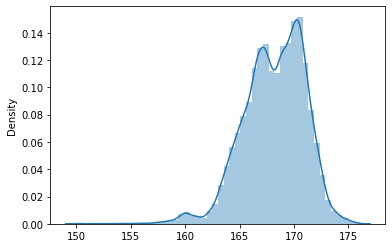

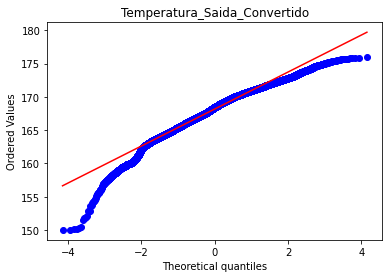

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


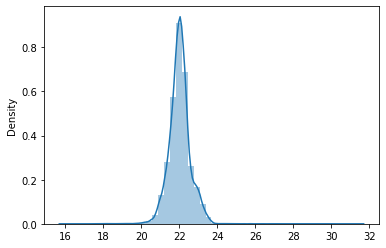

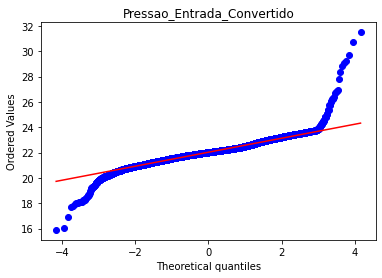

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


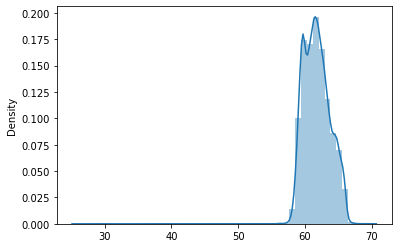

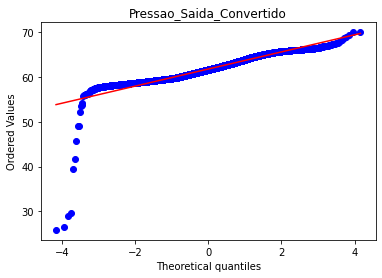

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


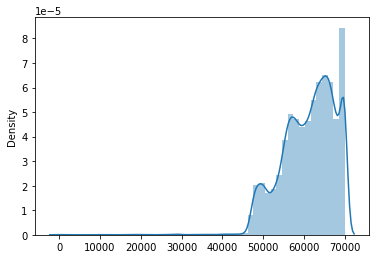

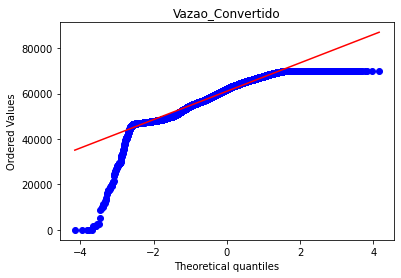

In [13]:
#QQ Plot
import pylab 
import scipy.stats as stats

variavel = ['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido','Vazao_Convertido']

for x in variavel:
  measurements = df_comenvelope[x].to_numpy()
  sns.distplot(measurements)
  plt.show()  
  stats.probplot(measurements, dist="norm", plot=pylab)
  pylab.title(x)
  pylab.show()



In [14]:
#Gráfico de anomalia
def plot_anomaly(score_data, threshold):
    # Mask to plot values above and below threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='OK eventos')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. eventos do permutador', fontweight='bold')
    plt.xlabel('Eventos do permutador')
    plt.ylabel('Z-score')
    plt.show()

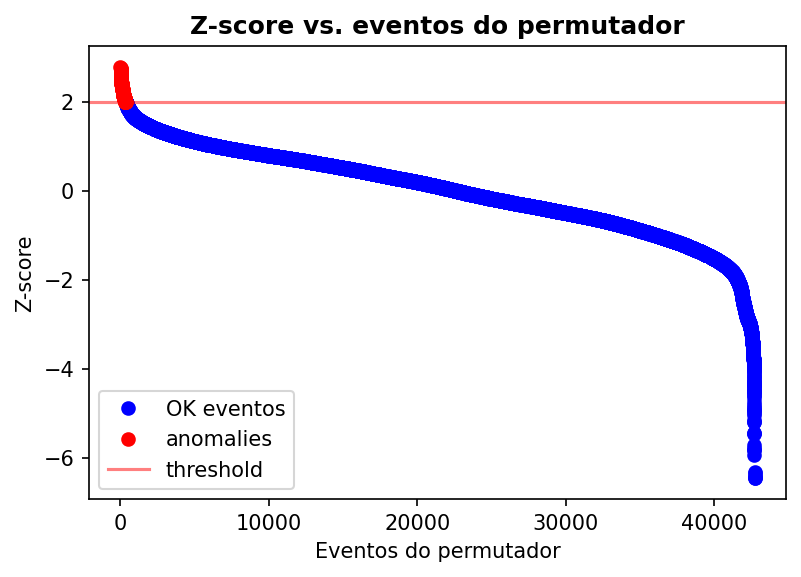

In [15]:
plot_anomaly(df_comenvelope['zscore_temperatura'], 2)

In [16]:
#Eventos anômalos utilizando a temperatura
zscore_anomalies = df_comenvelope[(df_comenvelope['zscore_temperatura'] > 2)]
zscore_anomalies

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido,Vazao_Convertido,zscore_temperatura
1731,16/05/2017 04:51,70.7203903,173.9486694,22.34920692,63.90720749,57178.22656,0.0,70.720390,173.948669,22.349207,63.907207,57178.22656,2.060350
1732,16/05/2017 04:52,70.7203903,174.0249939,22.3140316,63.82660675,56458.55078,0.0,70.720390,174.024994,22.314032,63.826607,56458.55078,2.087557
1733,16/05/2017 04:53,70.7249222,173.9530029,22.16614532,63.36903763,57601.85156,0.0,70.724922,173.953003,22.166145,63.369038,57601.85156,2.061895
1797,16/05/2017 05:57,70.8180695,173.8125,22.1422596,63.33645248,56902.42969,0.0,70.818069,173.812500,22.142260,63.336452,56902.42969,2.011812
2933,17/05/2017 00:53,70.3342209,174.0206909,22.427351,64.24908447,56233.55859,0.0,70.334221,174.020691,22.427351,64.249084,56233.55859,2.086023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39305,11/06/2017 07:05,70.6667404,173.8438263,21.6263752,60.70300674,59642.33203,0.0,70.666740,173.843826,21.626375,60.703007,59642.33203,2.022978
41295,12/06/2017 16:15,62.2715492,175.4312439,18.15756416,59.29327774,46769.35547,0.0,62.271549,175.431244,18.157564,59.293278,46769.35547,2.588829
41296,12/06/2017 16:16,61.5387535,173.8706055,19.20742607,56.30467606,56469.57422,0.0,61.538754,173.870605,19.207426,56.304676,56469.57422,2.032524
44310,14/06/2017 18:30,65.4459457,173.8625031,20.38748169,60.57300949,48807.64063,0.0,65.445946,173.862503,20.387482,60.573009,48807.64063,2.029636


Apesar da média ser sucetível à presença de anomalias, verificamos que os valores da mediana são muito próximos e não trarão 
resultados significativamente melhores. Por isso, não calcularemos o zscore modificado.

In [17]:
#Baseado no gráfico QQ-plot vamos revisar os valores de envelope
df_comenvelope = df_comenvelope[(df_comenvelope["Temperatura_Entrada_Convertido"]>60)]
df_comenvelope = df_comenvelope[(df_comenvelope["Temperatura_Saida_Convertido"]>160)]
df_comenvelope = df_comenvelope[(df_comenvelope["Pressao_Entrada_Convertido"]>20)]
df_comenvelope = df_comenvelope[(df_comenvelope["Vazao_Convertido"]>40000)]

df_comenvelopeteste = df_teste[(df_teste["Temperatura_Entrada_Convertido"]>60)]
df_comenvelopeteste = df_comenvelopeteste[(df_comenvelopeteste["Temperatura_Saida_Convertido"]>160)]
df_comenvelopeteste = df_comenvelopeteste[(df_comenvelopeteste["Pressao_Entrada_Convertido"]>20)]
df_comenvelopeteste = df_comenvelopeteste[(df_comenvelopeteste["Vazao_Convertido"]>40000)]

df_comenvelope

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido,Vazao_Convertido,zscore_temperatura
0,15/05/2017 00:00,67.5702057,169.8499146,21.88606644,61.96791077,60838.55078,0.0,67.570206,169.849915,21.886066,61.967911,60838.55078,0.599308
1,15/05/2017 00:01,67.5946274,169.4202728,21.78266335,61.41078568,61253.11328,0.0,67.594627,169.420273,21.782663,61.410786,61253.11328,0.446158
2,15/05/2017 00:02,67.5900803,168.9943085,21.7167778,61.02445602,61544.19141,0.0,67.590080,168.994308,21.716778,61.024456,61544.19141,0.294319
3,15/05/2017 00:03,67.5611191,168.6232605,21.62524033,60.53781509,62890.96875,0.0,67.561119,168.623260,21.625240,60.537815,62890.96875,0.162055
4,15/05/2017 00:04,67.4969482,168.0438232,21.59707069,60.04884338,63825.34766,0.0,67.496948,168.043823,21.597071,60.048843,63825.34766,-0.044491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45850,15/06/2017 20:10,66.9939346,167.8155365,21.22280312,58.88648605,59453.55078,0.0,66.993935,167.815537,21.222803,58.886486,59453.55078,-0.125866
45851,15/06/2017 20:11,66.6960831,168.3062439,20.95238113,58.68132019,61161.33203,0.0,66.696083,168.306244,20.952381,58.681320,61161.33203,0.049051
45852,15/06/2017 20:12,66.5251312,168.6187439,20.5511837,58.52051544,60145.41016,0.0,66.525131,168.618744,20.551184,58.520515,60145.41016,0.160445
45853,15/06/2017 20:13,66.1783752,168.4802094,20.90354156,58.53480148,62762,0.0,66.178375,168.480209,20.903542,58.534801,62762.00000,0.111063


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


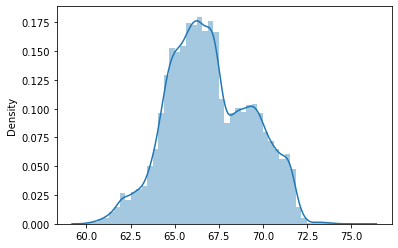

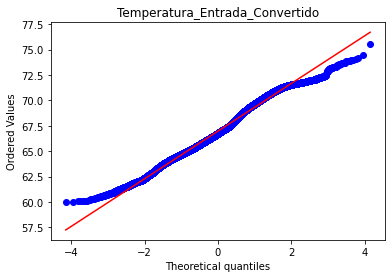

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


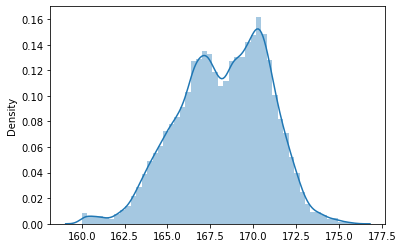

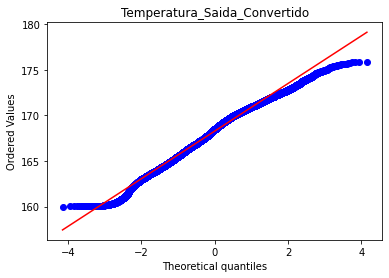

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


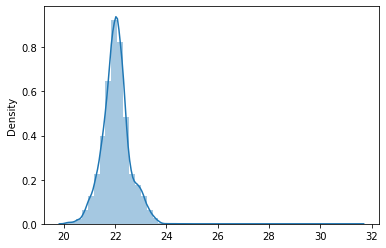

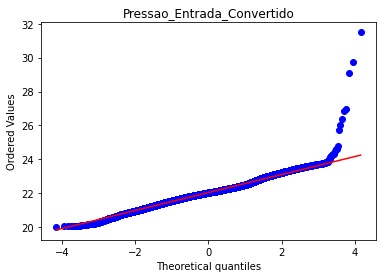

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


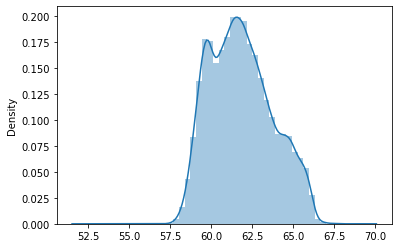

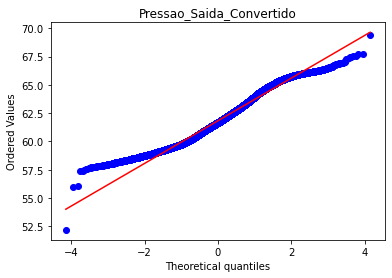

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


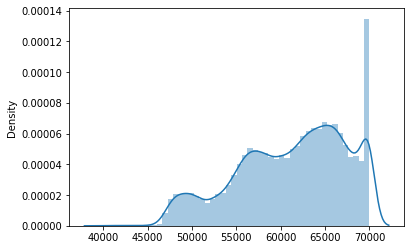

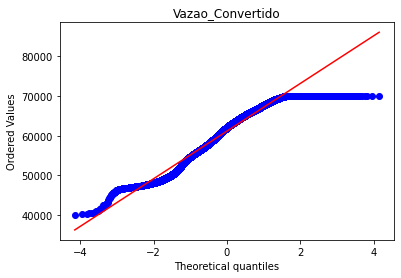

In [18]:
#QQ Plot
import pylab 
import scipy.stats as stats

variavel = ['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido','Vazao_Convertido']

for x in variavel:
  measurements = df_comenvelope[x].to_numpy()
  sns.distplot(measurements)
  plt.show()  
  stats.probplot(measurements, dist="norm", plot=pylab)
  pylab.title(x)
  pylab.show()

In [19]:
df_comenvelope

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido,Vazao_Convertido,zscore_temperatura
0,15/05/2017 00:00,67.5702057,169.8499146,21.88606644,61.96791077,60838.55078,0.0,67.570206,169.849915,21.886066,61.967911,60838.55078,0.599308
1,15/05/2017 00:01,67.5946274,169.4202728,21.78266335,61.41078568,61253.11328,0.0,67.594627,169.420273,21.782663,61.410786,61253.11328,0.446158
2,15/05/2017 00:02,67.5900803,168.9943085,21.7167778,61.02445602,61544.19141,0.0,67.590080,168.994308,21.716778,61.024456,61544.19141,0.294319
3,15/05/2017 00:03,67.5611191,168.6232605,21.62524033,60.53781509,62890.96875,0.0,67.561119,168.623260,21.625240,60.537815,62890.96875,0.162055
4,15/05/2017 00:04,67.4969482,168.0438232,21.59707069,60.04884338,63825.34766,0.0,67.496948,168.043823,21.597071,60.048843,63825.34766,-0.044491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45850,15/06/2017 20:10,66.9939346,167.8155365,21.22280312,58.88648605,59453.55078,0.0,66.993935,167.815537,21.222803,58.886486,59453.55078,-0.125866
45851,15/06/2017 20:11,66.6960831,168.3062439,20.95238113,58.68132019,61161.33203,0.0,66.696083,168.306244,20.952381,58.681320,61161.33203,0.049051
45852,15/06/2017 20:12,66.5251312,168.6187439,20.5511837,58.52051544,60145.41016,0.0,66.525131,168.618744,20.551184,58.520515,60145.41016,0.160445
45853,15/06/2017 20:13,66.1783752,168.4802094,20.90354156,58.53480148,62762,0.0,66.178375,168.480209,20.903542,58.534801,62762.00000,0.111063


In [20]:
#Identificou-se que a variável vazão tem um limite de range de medição restrito a 70000 m3/h, o que promove a existência de valores faltantes 
#para quando a vazão real estiver acima deste valor. Desta forma, a variável vazão não foi considerada como entrada na análise multivariável de
#detecção de anomalia deste trabalho, devido a um limite operacional do instrumento.

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

#Testando alguns valores de janela para cálculo da média móvel para verificar se os valores melhoram. 
#A janela=0 é sem cálculo de média móvel
variavel = ['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido']
janela = [0,1,2,3,4,5,6,7,8,9,10]
melhor_precisao = 0
for v in variavel: 
  for x in janela:
    if x==0:
        df_comenvelope[v+"_MM"]=df_comenvelope[v]
    else:
        df_comenvelope[v+"_MM"]=df_comenvelope[v].rolling(window=x).mean()

    media = df_comenvelope[v+"_MM"].mean()
    desvio_padrao = df_comenvelope[v+"_MM"].std(ddof=0)
    print('Janela {:.0f}'.format(x))    
    
    df_comenvelope=df_comenvelope.dropna(subset=[v+"_MM"])
    
    zscore_comenvelope_mm = ss.zscore(df_comenvelope[v+"_MM"], ddof=0)
    df_comenvelope = df_comenvelope.assign(zscore_mm=zscore_comenvelope_mm)
    #Testar diferentes valores de desvio padrão
    janela_desvio = [2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]
    for y in janela_desvio:
        df_comenvelope['Anom_Prev_'+v] = np.where(df_comenvelope[v+"_MM"]>media+y*desvio_padrao, 1,0)
    
        print('Variável - {} - com {} desvios padrão e média móvel de {}'.format(v,y,x))
        tn, fp, fn, tp = confusion_matrix(df_comenvelope["Anomalia"], df_comenvelope['Anom_Prev_'+v]).ravel()
        matriz = confusion_matrix(df_comenvelope["Anomalia"], df_comenvelope['Anom_Prev_'+v])
        print(matriz)
        print('True Negative {} - False Positive {} - False Negative {} - True Positive {}'.format(tn, fp, fn, tp))
        auc= roc_auc_score(df_comenvelope["Anomalia"], df_comenvelope['Anom_Prev_'+v])
        precisao = tp/(tp+fp)
        print('Precisão {}'.format(precisao))
        if precisao>melhor_precisao:
          melhor_cenario = 'Variável: {} - com {} desvios padrão e média móvel de {}.'.format(v,y,x)
          melhor_precisao = precisao
          melhor_preditor = v
          melhor_desvio_padrao = y
          melhor_media_movel = x
        print('')
        print('___________________________________')
        print('')

print('Melhor cenário: {} Precisão {}'.format(melhor_cenario, melhor_precisao))


Janela 0
Variável - Temperatura_Entrada_Convertido - com 2.0 desvios padrão e média móvel de 0
[[41463   599]
 [    2     1]]
True Negative 41463 - False Positive 599 - False Negative 2 - True Positive 1
Precisão 0.0016666666666666668

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.1 desvios padrão e média móvel de 0
[[41787   275]
 [    2     1]]
True Negative 41787 - False Positive 275 - False Negative 2 - True Positive 1
Precisão 0.0036231884057971015

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.2 desvios padrão e média móvel de 0
[[41924   138]
 [    2     1]]
True Negative 41924 - False Positive 138 - False Negative 2 - True Positive 1
Precisão 0.007194244604316547

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 0
[[41986    76]
 [    3     0]]
True Negative 41986 - False Positive 76 - False Negative 3 - True Positive 0
Precis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41914   133]
 [    2     1]]
True Negative 41914 - False Positive 133 - False Negative 2 - True Positive 1
Precisão 0.007462686567164179

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 6
[[41978    69]
 [    3     0]]
True Negative 41978 - False Positive 69 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.4 desvios padrão e média móvel de 6
[[41988    59]
 [    3     0]]
True Negative 41988 - False Positive 59 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.5 desvios padrão e média móvel de 6
[[41993    54]
 [    3     0]]
True Negative 41993 - False Positive 54 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.6 desvios padrão e média móvel de 6
[[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41448   593]
 [    2     1]]
True Negative 41448 - False Positive 593 - False Negative 2 - True Positive 1
Precisão 0.0016835016835016834

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.1 desvios padrão e média móvel de 7
[[41778   263]
 [    2     1]]
True Negative 41778 - False Positive 263 - False Negative 2 - True Positive 1
Precisão 0.003787878787878788

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.2 desvios padrão e média móvel de 7
[[41907   134]
 [    2     1]]
True Negative 41907 - False Positive 134 - False Negative 2 - True Positive 1
Precisão 0.007407407407407408

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 7
[[41971    70]
 [    3     0]]
True Negative 41971 - False Positive 70 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41773   261]
 [    2     1]]
True Negative 41773 - False Positive 261 - False Negative 2 - True Positive 1
Precisão 0.003816793893129771

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.2 desvios padrão e média móvel de 8
[[41900   134]
 [    3     0]]
True Negative 41900 - False Positive 134 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 8
[[41968    66]
 [    3     0]]
True Negative 41968 - False Positive 66 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.4 desvios padrão e média móvel de 8
[[41976    58]
 [    3     0]]
True Negative 41976 - False Positive 58 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.5 desvios padrão e média móvel de 8
[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41891   135]
 [    3     0]]
True Negative 41891 - False Positive 135 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 9
[[41960    66]
 [    3     0]]
True Negative 41960 - False Positive 66 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.4 desvios padrão e média móvel de 9
[[41968    58]
 [    3     0]]
True Negative 41968 - False Positive 58 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.5 desvios padrão e média móvel de 9
[[41973    53]
 [    3     0]]
True Negative 41973 - False Positive 53 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.6 desvios padrão e média móvel de 9
[[41978    48]
 [  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41428   589]
 [    2     1]]
True Negative 41428 - False Positive 589 - False Negative 2 - True Positive 1
Precisão 0.001694915254237288

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.1 desvios padrão e média móvel de 10
[[41768   249]
 [    2     1]]
True Negative 41768 - False Positive 249 - False Negative 2 - True Positive 1
Precisão 0.004

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.2 desvios padrão e média móvel de 10
[[41885   132]
 [    3     0]]
True Negative 41885 - False Positive 132 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 10
[[41953    64]
 [    3     0]]
True Negative 41953 - False Positive 64 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Temperatura_Entrada_Convertido - com 2.4 desvios padrão e média móvel 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41699   318]
 [    1     2]]
True Negative 41699 - False Positive 318 - False Negative 1 - True Positive 2
Precisão 0.00625

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 0
[[41785   232]
 [    1     2]]
True Negative 41785 - False Positive 232 - False Negative 1 - True Positive 2
Precisão 0.008547008547008548

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 0
[[41858   159]
 [    1     2]]
True Negative 41858 - False Positive 159 - False Negative 1 - True Positive 2
Precisão 0.012422360248447204

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desvios padrão e média móvel de 0
[[41896   121]
 [    1     2]]
True Negative 41896 - False Positive 121 - False Negative 1 - True Positive 2
Precisão 0.016260162601626018

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.5 des

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[42017     0]
 [    3     0]]
True Negative 42017 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 1
Variável - Temperatura_Saida_Convertido - com 2.0 desvios padrão e média móvel de 1
[[41598   419]
 [    1     2]]
True Negative 41598 - False Positive 419 - False Negative 1 - True Positive 2
Precisão 0.004750593824228029

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 1
[[41699   318]
 [    1     2]]
True Negative 41699 - False Positive 318 - False Negative 1 - True Positive 2
Precisão 0.00625

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 1
[[41785   232]
 [    1     2]]
True Negative 41785 - False Positive 232 - False Negative 1 - True Positive 2
Precisão 0.008547008547008548

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrã

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41606   410]
 [    1     2]]
True Negative 41606 - False Positive 410 - False Negative 1 - True Positive 2
Precisão 0.0048543689320388345

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 2
[[41704   312]
 [    1     2]]
True Negative 41704 - False Positive 312 - False Negative 1 - True Positive 2
Precisão 0.006369426751592357

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 2
[[41784   232]
 [    1     2]]
True Negative 41784 - False Positive 232 - False Negative 1 - True Positive 2
Precisão 0.008547008547008548

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 2
[[41848   168]
 [    1     2]]
True Negative 41848 - False Positive 168 - False Negative 1 - True Positive 2
Precisão 0.011764705882352941

___________________________________

Variável - Temperatura_Saida_Convertido

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41700   314]
 [    1     2]]
True Negative 41700 - False Positive 314 - False Negative 1 - True Positive 2
Precisão 0.006329113924050633

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 3
[[41784   230]
 [    1     2]]
True Negative 41784 - False Positive 230 - False Negative 1 - True Positive 2
Precisão 0.008620689655172414

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 3
[[41854   160]
 [    1     2]]
True Negative 41854 - False Positive 160 - False Negative 1 - True Positive 2
Precisão 0.012345679012345678

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desvios padrão e média móvel de 3
[[41906   108]
 [    1     2]]
True Negative 41906 - False Positive 108 - False Negative 1 - True Positive 2
Precisão 0.01818181818181818

___________________________________

Variável - Temperatura_Saida_Convertido -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[42014     0]
 [    3     0]]
True Negative 42014 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 4
Variável - Temperatura_Saida_Convertido - com 2.0 desvios padrão e média móvel de 4
[[41606   405]
 [    1     2]]
True Negative 41606 - False Positive 405 - False Negative 1 - True Positive 2
Precisão 0.004914004914004914

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 4
[[41697   314]
 [    1     2]]
True Negative 41697 - False Positive 314 - False Negative 1 - True Positive 2
Precisão 0.006329113924050633

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 4
[[41778   233]
 [    1     2]]
True Negative 41778 - False Positive 233 - False Negative 1 - True Positive 2
Precisão 0.00851063829787234

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41607   400]
 [    1     2]]
True Negative 41607 - False Positive 400 - False Negative 1 - True Positive 2
Precisão 0.004975124378109453

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 5
[[41700   307]
 [    1     2]]
True Negative 41700 - False Positive 307 - False Negative 1 - True Positive 2
Precisão 0.006472491909385114

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 5
[[41779   228]
 [    1     2]]
True Negative 41779 - False Positive 228 - False Negative 1 - True Positive 2
Precisão 0.008695652173913044

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 5
[[41849   158]
 [    1     2]]
True Negative 41849 - False Positive 158 - False Negative 1 - True Positive 2
Precisão 0.0125

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


Precisão 0.00516795865633075

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 6
[[41701   301]
 [    1     2]]
True Negative 41701 - False Positive 301 - False Negative 1 - True Positive 2
Precisão 0.006600660066006601

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 6
[[41771   231]
 [    1     2]]
True Negative 41771 - False Positive 231 - False Negative 1 - True Positive 2
Precisão 0.008583690987124463

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 6
[[41847   155]
 [    1     2]]
True Negative 41847 - False Positive 155 - False Negative 1 - True Positive 2
Precisão 0.012738853503184714

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desvios padrão e média móvel de 6
[[41897   105]
 [    1     2]]
True Negative 41897 - False Positiv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 7
[[41702   294]
 [    1     2]]
True Negative 41702 - False Positive 294 - False Negative 1 - True Positive 2
Precisão 0.006756756756756757

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 7
[[41767   229]
 [    1     2]]
True Negative 41767 - False Positive 229 - False Negative 1 - True Positive 2
Precisão 0.008658008658008658

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 7
[[41833   163]
 [    1     2]]
True Negative 41833 - False Positive 163 - False Negative 1 - True Positive 2
Precisão 0.012121212121212121

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desvios padrão e média móvel de 7
[[41890   106]
 [    1     2]]
True Negative 41890 - False Positive 106 - False Negative 1 - True Positive 2
Precisão 0.0185185185185

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41709   280]
 [    1     2]]
True Negative 41709 - False Positive 280 - False Negative 1 - True Positive 2
Precisão 0.0070921985815602835

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 8
[[41769   220]
 [    1     2]]
True Negative 41769 - False Positive 220 - False Negative 1 - True Positive 2
Precisão 0.009009009009009009

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 8
[[41820   169]
 [    1     2]]
True Negative 41820 - False Positive 169 - False Negative 1 - True Positive 2
Precisão 0.011695906432748537

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.4 desvios padrão e média móvel de 8
[[41886   103]
 [    1     2]]
True Negative 41886 - False Positive 103 - False Negative 1 - True Positive 2
Precisão 0.01904761904761905

___________________________________

Variável - Temperatura_Saida_Convertido 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41989     0]
 [    3     0]]
True Negative 41989 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 9
Variável - Temperatura_Saida_Convertido - com 2.0 desvios padrão e média móvel de 9
[[41620   361]
 [    1     2]]
True Negative 41620 - False Positive 361 - False Negative 1 - True Positive 2
Precisão 0.005509641873278237

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 9
[[41706   275]
 [    1     2]]
True Negative 41706 - False Positive 275 - False Negative 1 - True Positive 2
Precisão 0.007220216606498195

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 9
[[41764   217]
 [    1     2]]
True Negative 41764 - False Positive 217 - False Negative 1 - True Positive 2
Precisão 0.0091324200913242

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 de

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41612   360]
 [    1     2]]
True Negative 41612 - False Positive 360 - False Negative 1 - True Positive 2
Precisão 0.0055248618784530384

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.1 desvios padrão e média móvel de 10
[[41703   269]
 [    1     2]]
True Negative 41703 - False Positive 269 - False Negative 1 - True Positive 2
Precisão 0.007380073800738007

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.2 desvios padrão e média móvel de 10
[[41755   217]
 [    1     2]]
True Negative 41755 - False Positive 217 - False Negative 1 - True Positive 2
Precisão 0.0091324200913242

___________________________________

Variável - Temperatura_Saida_Convertido - com 2.3 desvios padrão e média móvel de 10
[[41800   172]
 [    2     1]]
True Negative 41800 - False Positive 172 - False Negative 2 - True Positive 1
Precisão 0.005780346820809248

___________________________________

Variável - Temperatura_Saida_Convertid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[40814  1158]
 [    2     1]]
True Negative 40814 - False Positive 1158 - False Negative 2 - True Positive 1
Precisão 0.0008628127696289905

___________________________________

Variável - Pressao_Entrada_Convertido - com 2.2 desvios padrão e média móvel de 0
[[41019   953]
 [    3     0]]
True Negative 41019 - False Positive 953 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Entrada_Convertido - com 2.3 desvios padrão e média móvel de 0
[[41206   766]
 [    3     0]]
True Negative 41206 - False Positive 766 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Entrada_Convertido - com 2.4 desvios padrão e média móvel de 0
[[41376   596]
 [    3     0]]
True Negative 41376 - False Positive 596 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Entrada_Convertido - com 2.5 desvios padrão e média móvel de 0
[[41512   460

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[40639  1282]
 [    2     1]]
True Negative 40639 - False Positive 1282 - False Negative 2 - True Positive 1
Precisão 0.000779423226812159

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 4
[[41121   800]
 [    2     1]]
True Negative 41121 - False Positive 800 - False Negative 2 - True Positive 1
Precisão 0.0012484394506866417

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 4
[[41517   404]
 [    3     0]]
True Negative 41517 - False Positive 404 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Saida_Convertido - com 2.3 desvios padrão e média móvel de 4
[[41774   147]
 [    3     0]]
True Negative 41774 - False Positive 147 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Saida_Convertido - com 2.4 desvios padrão e média móvel de 4
[[41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41921     0]
 [    3     0]]
True Negative 41921 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Variável - Pressao_Saida_Convertido - com 3.0 desvios padrão e média móvel de 4
[[41921     0]
 [    3     0]]
True Negative 41921 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 5
Variável - Pressao_Saida_Convertido - com 2.0 desvios padrão e média móvel de 5
[[40615  1302]
 [    2     1]]
True Negative 40615 - False Positive 1302 - False Negative 2 - True Positive 1
Precisão 0.0007674597083653108

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 5
[[41110   807]
 [    2     1]]
True Negative 41110 - False Positive 807 - False Negative 2 - True Positive 1
Precisão 0.0012376237623762376

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41917     0]
 [    3     0]]
True Negative 41917 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 6
Variável - Pressao_Saida_Convertido - com 2.0 desvios padrão e média móvel de 6
[[40553  1359]
 [    2     1]]
True Negative 40553 - False Positive 1359 - False Negative 2 - True Positive 1
Precisão 0.0007352941176470588

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 6
[[41081   831]
 [    2     1]]
True Negative 41081 - False Positive 831 - False Negative 2 - True Positive 1
Precisão 0.001201923076923077

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 6
[[41439   473]
 [    2     1]]
True Negative 41439 - False Positive 473 - False Negative 2 - True Positive 1
Precisão 0.002109704641350211

___________________________________

Variável - Pressao_Saida_Convertido - com 2.3 desvios padrão

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[40476  1430]
 [    1     2]]
True Negative 40476 - False Positive 1430 - False Negative 1 - True Positive 2
Precisão 0.0013966480446927375

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 7
[[41029   877]
 [    2     1]]
True Negative 41029 - False Positive 877 - False Negative 2 - True Positive 1
Precisão 0.0011389521640091116

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 7
[[41399   507]
 [    2     1]]
True Negative 41399 - False Positive 507 - False Negative 2 - True Positive 1
Precisão 0.001968503937007874

___________________________________

Variável - Pressao_Saida_Convertido - com 2.3 desvios padrão e média móvel de 7
[[41683   223]
 [    3     0]]
True Negative 41683 - False Positive 223 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Saida_Convertido - com 2.4 desvios padrão e méd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41906     0]
 [    3     0]]
True Negative 41906 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Variável - Pressao_Saida_Convertido - com 3.0 desvios padrão e média móvel de 7
[[41906     0]
 [    3     0]]
True Negative 41906 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 8
Variável - Pressao_Saida_Convertido - com 2.0 desvios padrão e média móvel de 8
[[40445  1454]
 [    1     2]]
True Negative 40445 - False Positive 1454 - False Negative 1 - True Positive 2
Precisão 0.0013736263736263737

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 8
[[40975   924]
 [    2     1]]
True Negative 40975 - False Positive 924 - False Negative 2 - True Positive 1
Precisão 0.001081081081081081

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[40920   971]
 [    1     2]]
True Negative 40920 - False Positive 971 - False Negative 1 - True Positive 2
Precisão 0.0020554984583761563

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 9
[[41330   561]
 [    2     1]]
True Negative 41330 - False Positive 561 - False Negative 2 - True Positive 1
Precisão 0.0017793594306049821

___________________________________

Variável - Pressao_Saida_Convertido - com 2.3 desvios padrão e média móvel de 9
[[41572   319]
 [    3     0]]
True Negative 41572 - False Positive 319 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Saida_Convertido - com 2.4 desvios padrão e média móvel de 9
[[41796    95]
 [    3     0]]
True Negative 41796 - False Positive 95 - False Negative 3 - True Positive 0
Precisão 0.0

___________________________________

Variável - Pressao_Saida_Convertido - com 2.5 desvios padrão e média móvel de 9
[[418

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


[[41891     0]
 [    3     0]]
True Negative 41891 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan

___________________________________

Janela 10
Variável - Pressao_Saida_Convertido - com 2.0 desvios padrão e média móvel de 10
[[40439  1443]
 [    1     2]]
True Negative 40439 - False Positive 1443 - False Negative 1 - True Positive 2
Precisão 0.001384083044982699

___________________________________

Variável - Pressao_Saida_Convertido - com 2.1 desvios padrão e média móvel de 10
[[40878  1004]
 [    1     2]]
True Negative 40878 - False Positive 1004 - False Negative 1 - True Positive 2
Precisão 0.0019880715705765406

___________________________________

Variável - Pressao_Saida_Convertido - com 2.2 desvios padrão e média móvel de 10
[[41286   596]
 [    2     1]]
True Negative 41286 - False Positive 596 - False Negative 2 - True Positive 1
Precisão 0.0016750418760469012

___________________________________

Variável - Pressao_Saida_Convertido - com 2.3 desvios 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars


In [21]:
zscore_anomalies = df_comenvelope[(df_comenvelope['Anomalia'] == 1)]
zscore_anomalies

,Data,Temperatura_Entrada,Temperatura_Saida,Pressao_Entrada,Pressao_Saida,Vazao,Anomalia,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido,Vazao_Convertido,zscore_temperatura,Temperatura_Entrada_Convertido_MM,zscore_mm,Anom_Prev_Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido_MM,Anom_Prev_Temperatura_Saida_Convertido,Pressao_Entrada_Convertido_MM,Anom_Prev_Pressao_Entrada_Convertido,Pressao_Saida_Convertido_MM,Anom_Prev_Pressao_Saida_Convertido
27981,03/06/2017 10:21,71.4040604,175.6589508,22.65690994,65.21379852,54745.89844,1.0,71.404060,175.658951,22.656910,65.213799,54745.89844,2.669997,70.417492,2.146724,0,173.945424,0,23.026108,0,65.559201,0
28361,03/06/2017 16:41,72.2588501,175.4966888,23.1894207,65.49465179,56882.87891,1.0,72.258850,175.496689,23.189421,65.494652,56882.87891,2.612158,72.109894,2.253788,0,175.306514,0,23.376793,1,65.744863,0
30302,05/06/2017 01:02,65.3480453,169.9436493,20.63508224,60.74482727,41922.89844,1.0,65.348045,169.943649,20.635082,60.744827,41922.89844,0.632721,65.365063,0.032257,0,170.076199,0,21.305387,0,61.892435,0


In [22]:
if melhor_media_movel==0:
  df_comenvelope[melhor_preditor+"_Melhor_MM"]=df_comenvelope[melhor_preditor]
else:
  df_comenvelope[melhor_preditor+"_Melhor_MM"]=df_comenvelope[melhor_preditor].rolling(window=melhor_media_movel).mean()

media = df_comenvelope[melhor_preditor+"_Melhor_MM"].mean()
desvio_padrao = df_comenvelope[melhor_preditor+"_Melhor_MM"].std(ddof=0)

df_comenvelope['Melhor_Anom_Prev_'+melhor_preditor] = np.where(df_comenvelope[melhor_preditor+"_Melhor_MM"]>media+melhor_desvio_padrao*desvio_padrao, 1,0)

zscore_anomalies = df_comenvelope[(df_comenvelope['Melhor_Anom_Prev_'+melhor_preditor] == 1)]

print(zscore_anomalies)

matriz = confusion_matrix(df_comenvelope["Anomalia"], df_comenvelope['Melhor_Anom_Prev_'+melhor_preditor])
tn, fp, fn, tp = confusion_matrix(df_comenvelope["Anomalia"], df_comenvelope['Melhor_Anom_Prev_'+melhor_preditor]).ravel()
print(matriz)

print('True Negative {} - False Positive {} - False Negative {} - True Positive {}'.format(tn, fp, fn, tp))
precisao = tp/(tp+fp)
sensibilidade = tp/(tp+fn)
auc= roc_auc_score(df_comenvelope["Anomalia"], df_comenvelope['Melhor_Anom_Prev_'+melhor_preditor])
print('Precisão {} e Sensibilidade {}'.format(precisao, sensibilidade))


                   Data  ... Melhor_Anom_Prev_Temperatura_Saida_Convertido
28361  03/06/2017 16:41  ...                                             1
28362  03/06/2017 16:42  ...                                             1

[2 rows x 24 columns]
[[41881     1]
 [    2     1]]
True Negative 41881 - False Positive 1 - False Negative 2 - True Positive 1
Precisão 0.5 e Sensibilidade 0.3333333333333333


In [23]:
if melhor_media_movel==0:
  df_comenvelopeteste[melhor_preditor+"_Melhor_MM"]=df_comenvelopeteste[melhor_preditor]
else:
  df_comenvelopeteste[melhor_preditor+"_Melhor_MM"]=df_comenvelopeteste[melhor_preditor].rolling(window=melhor_media_movel).mean()

media = df_comenvelopeteste[melhor_preditor+"_Melhor_MM"].mean()
desvio_padrao = df_comenvelopeteste[melhor_preditor+"_Melhor_MM"].std(ddof=0)

df_comenvelopeteste['Melhor_Anom_Prev_'+melhor_preditor] = np.where(df_comenvelopeteste[melhor_preditor+"_Melhor_MM"]>media+melhor_desvio_padrao*desvio_padrao, 1,0)

zscore_anomalies = df_comenvelopeteste[(df_comenvelopeteste['Melhor_Anom_Prev_'+melhor_preditor] == 1)]
zscore_anomalies

print(zscore_anomalies)

matriz = confusion_matrix(df_comenvelopeteste["Anomalia"], df_comenvelopeteste['Melhor_Anom_Prev_'+melhor_preditor])
tn, fp, fn, tp = confusion_matrix(df_comenvelopeteste["Anomalia"], df_comenvelopeteste['Melhor_Anom_Prev_'+melhor_preditor]).ravel()
print(matriz)

print('True Negative {} - False Positive {} - False Negative {} - True Positive {}'.format(tn, fp, fn, tp))
precisao = tp/(tp+fp)

auc= roc_auc_score(df_comenvelopeteste["Anomalia"], df_comenvelopeteste['Melhor_Anom_Prev_'+melhor_preditor])
print('Precisão {}'.format(precisao))


Empty DataFrame
Columns: [Data, Temperatura_Entrada, Temperatura_Saida, Pressao_Entrada, Pressao_Saida, Vazao, Anomalia, Temperatura_Entrada_Convertido, Temperatura_Saida_Convertido, Pressao_Entrada_Convertido, Pressao_Saida_Convertido, Vazao_Convertido, Temperatura_Saida_Convertido_Melhor_MM, Melhor_Anom_Prev_Temperatura_Saida_Convertido]
Index: []
[[19556     0]
 [    3     0]]
True Negative 19556 - False Positive 0 - False Negative 3 - True Positive 0
Precisão nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


3) Utilizar técnicas estatisticas para obter as anomalias com análises multivariáveis

In [24]:
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler  
from sklearn.covariance import EmpiricalCovariance, MinCovDet

In [25]:
X = df_comenvelope[["Temperatura_Entrada_Convertido","Temperatura_Saida_Convertido","Pressao_Entrada_Convertido","Pressao_Saida_Convertido"]]
X

,Temperatura_Entrada_Convertido,Temperatura_Saida_Convertido,Pressao_Entrada_Convertido,Pressao_Saida_Convertido
180,67.477066,168.341873,21.626375,60.578762
181,67.496948,168.208466,21.645910,60.293041
182,67.463432,168.016251,21.614985,60.293041
183,67.361206,167.924393,21.557999,60.128330
184,67.239113,167.632980,21.530725,59.990913
...,...,...,...,...
45850,66.993935,167.815537,21.222803,58.886486
45851,66.696083,168.306244,20.952381,58.681320
45852,66.525131,168.618744,20.551184,58.520515
45853,66.178375,168.480209,20.903542,58.534801


In [26]:
pca = PCA(2)    
T = pca.fit_transform(StandardScaler().fit_transform(X))

In [27]:
T

array([[-0.59731227, -0.81586686],
       [-0.67888238, -0.86900228],
       [-0.75418428, -0.85807402],
       ...,
       [-2.2536021 , -2.00781405],
       [-2.01790649, -1.61805781],
       [-2.32699628, -1.72546177]])

In [28]:
robust_cov = MinCovDet().fit(T[:,:5])  
m = robust_cov.mahalanobis(T[:,:5])
robust_cov

MinCovDet(assume_centered=False, random_state=None, store_precision=True,
          support_fraction=None)

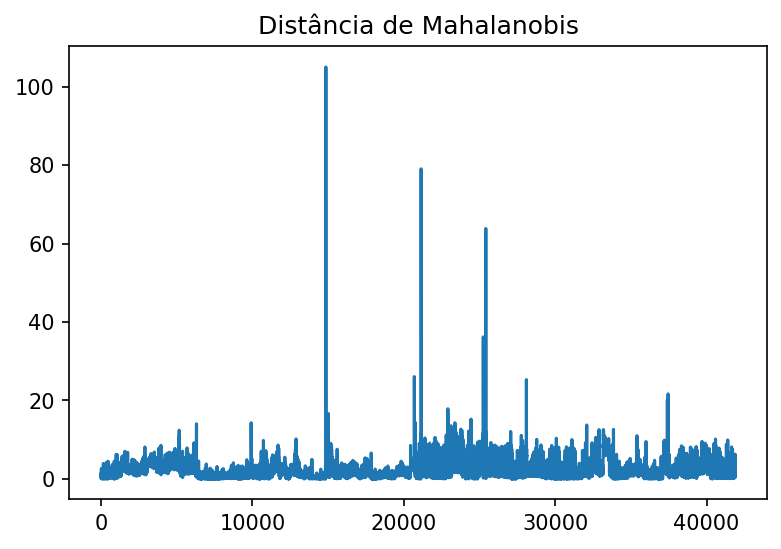

In [29]:
import matplotlib.pyplot as grafico
grafico.figure(dpi=150)
grafico.title("Distância de Mahalanobis")

grafico.plot(m)
grafico.show()


In [30]:
K=[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
melhor_previsao = 0
X["Distancia_Mahalanobis"] = m
for i in K:
  threshold = np.mean(m) * i
  X["Anomalia_Prevista"] = 0
  X["Anomalia_Prevista"] = np.where(X["Distancia_Mahalanobis"]>= threshold, 1,0)
  
  tn, fp, fn, tp = confusion_matrix(df_comenvelope["Anomalia"], X["Anomalia_Prevista"]).ravel()
  auc= roc_auc_score(df_comenvelope["Anomalia"], X["Anomalia_Prevista"])
  precisao = tp/(tp+fp)

  if precisao>melhor_previsao:
    melhor_previsao = precisao
    melhor_tn = tn
    melhor_fp = fp
    melhor_fn = fn
    melhor_tp = tp
    melhor_K = i

print('Vaiável K {} True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(melhor_K, melhor_tn, melhor_fp, melhor_fn, melhor_tp, melhor_previsao))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Vaiável K 4 True Negative 41411 - False Positive 471 - False Negative 2 - True Positive 1 Precisão 0.00211864406779661


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [31]:
X_Teste = df_comenvelopeteste[["Temperatura_Entrada_Convertido","Temperatura_Saida_Convertido","Pressao_Entrada_Convertido","Pressao_Saida_Convertido"]]
pca = PCA(2)    
T = pca.fit_transform(StandardScaler().fit_transform(X_Teste))    
robust_cov = MinCovDet().fit(T[:,:5])  
m = robust_cov.mahalanobis(T[:,:5])
X_Teste["Distancia_Mahalanobis"]=m

threshold = np.mean(m) * melhor_K
X_Teste["Anomalia_Prevista_Mahalanobis"] = 0
X_Teste["Anomalia_Prevista_Mahalanobis"] = np.where(X_Teste["Distancia_Mahalanobis"]>= threshold, 1,0)

tn, fp, fn, tp = confusion_matrix(df_comenvelopeteste["Anomalia"], X_Teste["Anomalia_Prevista_Mahalanobis"]).ravel()
auc= roc_auc_score(df_comenvelopeteste["Anomalia"], X_Teste["Anomalia_Prevista_Mahalanobis"])
precisao = tp/(tp+fp)

print('Vaiável K {} True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(melhor_K, tn, fp, fn, tp, precisao))
df_comenvelopeteste["Anomalia_Prevista_Mahalanobis"] = X_Teste["Anomalia_Prevista_Mahalanobis"]

mahalanobis_anomalies = df_comenvelopeteste[(df_comenvelopeteste['Anomalia_Prevista_Mahalanobis'] == 1)]

print(mahalanobis_anomalies)


Vaiável K 4 True Negative 18985 - False Positive 571 - False Negative 3 - True Positive 0 Precisão 0.0
                   Data  ... Anomalia_Prevista_Mahalanobis
1181   10/01/2018 19:41  ...                             1
1182   10/01/2018 19:42  ...                             1
1183   10/01/2018 19:43  ...                             1
1247   10/01/2018 20:47  ...                             1
1248   10/01/2018 20:48  ...                             1
...                 ...  ...                           ...
20047  23/01/2018 22:07  ...                             1
20048  23/01/2018 22:08  ...                             1
20051  23/01/2018 22:11  ...                             1
20052  23/01/2018 22:12  ...                             1
20066  23/01/2018 22:26  ...                             1

[571 rows x 15 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [32]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score

In [33]:
X_Aux = df_comenvelope[['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido','Anomalia']]

X = X_Aux[['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido']]
Y = X_Aux[['Anomalia']]

X_Teste = df_comenvelopeteste[['Temperatura_Entrada_Convertido','Temperatura_Saida_Convertido','Pressao_Entrada_Convertido','Pressao_Saida_Convertido']]
Y_Teste = df_comenvelopeteste[['Anomalia']]


In [34]:
qtde_estimators = [100,200,300,400,500]
melhor_precisao = 0

for e in qtde_estimators:
  clfIF=IsolationForest(n_estimators=e, max_samples=len(X), contamination='auto',random_state=None, 
                    verbose=0)
  clfIF.fit(X)
  y_pred = clfIF.predict(X)

  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1
  n_errors = (y_pred != Y['Anomalia']).sum()
  # Run Classification Metrics
  print("IsolationForest: {}".format(n_errors))

  tn, fp, fn, tp = confusion_matrix(Y["Anomalia"], y_pred).ravel()
  auc= roc_auc_score(Y["Anomalia"], y_pred)
  precisao = tp/(tp+fp)
  print('Qtde Estimators {} True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(e, tn, fp, fn, tp, precisao))

  auc= roc_auc_score(Y["Anomalia"], y_pred)
  
  if precisao>melhor_precisao:
    melhor_qtde_estimator = e
    melhor_precisao = precisao

print('Melhor Precisão {} - melhor qtde estimator {} '.format(melhor_precisao,melhor_qtde_estimator))  

IsolationForest: 1218
Qtde Estimators 100 True Negative 40665 - False Positive 1217 - False Negative 1 - True Positive 2 Precisão 0.0016406890894175555
IsolationForest: 1254
Qtde Estimators 200 True Negative 40629 - False Positive 1253 - False Negative 1 - True Positive 2 Precisão 0.0015936254980079682
IsolationForest: 1290
Qtde Estimators 300 True Negative 40592 - False Positive 1290 - False Negative 0 - True Positive 3 Precisão 0.002320185614849188
IsolationForest: 1243
Qtde Estimators 400 True Negative 40640 - False Positive 1242 - False Negative 1 - True Positive 2 Precisão 0.001607717041800643
IsolationForest: 1201
Qtde Estimators 500 True Negative 40682 - False Positive 1200 - False Negative 1 - True Positive 2 Precisão 0.0016638935108153079
Melhor Precisão 0.002320185614849188 - melhor qtde estimator 300 


In [35]:
clfIF=IsolationForest(n_estimators=melhor_qtde_estimator, max_samples=len(X), contamination='auto',random_state=None, 
                    verbose=0)
clfIF.fit(X)
y_pred_teste = clfIF.predict(X_Teste)
y_pred_teste[y_pred_teste == 1] = 0
y_pred_teste[y_pred_teste == -1] = 1
n_errors = (y_pred_teste != Y_Teste['Anomalia']).sum()
# Run Classification Metrics
print("IsolationForest: {}".format(n_errors))

tn, fp, fn, tp = confusion_matrix(Y_Teste["Anomalia"], y_pred_teste).ravel()
auc= roc_auc_score(Y_Teste["Anomalia"], y_pred_teste)
precisao = tp/(tp+fp)
print('True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(tn, fp, fn, tp, precisao))


IsolationForest: 307
True Negative 19252 - False Positive 304 - False Negative 3 - True Positive 0 Precisão 0.0


In [36]:
tipo_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
tipo_degree = [1,3,5]
melhor_precisao = 0

for k in tipo_kernel:
  for d in tipo_degree:
    clfSVM=OneClassSVM(kernel=k, degree=d,  max_iter=-1)
    clfSVM.fit(X)
    y_pred = clfSVM.predict(X)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y['Anomalia']).sum()
    # Run Classification Metrics
    print("SVM: {}".format(n_errors))

    tn, fp, fn, tp = confusion_matrix(Y["Anomalia"], y_pred).ravel()
    auc= roc_auc_score(Y["Anomalia"], y_pred)
    precisao = tp/(tp+fp)
  
    if precisao>melhor_precisao:
      melhor_kernel = k
      melhor_degree = d
      melhor_precisao = precisao

    print('kernel {} e Degree {} True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(k,d,tn, fp, fn, tp, precisao))

print('Melhor Precisão {} - melhor kernel {} e melhor degree {}'.format(melhor_precisao,melhor_kernel,melhor_degree))

SVM: 20945
kernel linear e Degree 1 True Negative 20940 - False Positive 20942 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20945
kernel linear e Degree 3 True Negative 20940 - False Positive 20942 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20945
kernel linear e Degree 5 True Negative 20940 - False Positive 20942 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20946
kernel poly e Degree 1 True Negative 20939 - False Positive 20943 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20946
kernel poly e Degree 3 True Negative 20939 - False Positive 20943 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20946
kernel poly e Degree 5 True Negative 20939 - False Positive 20943 - False Negative 3 - True Positive 0 Precisão 0.0
SVM: 20942
kernel rbf e Degree 1 True Negative 20941 - False Positive 20941 - False Negative 1 - True Positive 2 Precisão 9.549730220121282e-05
SVM: 20942
kernel rbf e Degree 3 True Negative 20941 - False Positive 20941 - False Nega

In [37]:
clfSVM=OneClassSVM(kernel=melhor_kernel, degree=melhor_degree,  max_iter=-1)
clfSVM.fit(X)
y_pred_teste = clfSVM.predict(X_Teste)
y_pred_teste[y_pred_teste == 1] = 0
y_pred_teste[y_pred_teste == -1] = 1
n_errors = (y_pred_teste != Y_Teste['Anomalia']).sum()
# Run Classification Metrics
print("SVM: {}".format(n_errors))

tn, fp, fn, tp = confusion_matrix(Y_Teste["Anomalia"], y_pred_teste).ravel()
auc= roc_auc_score(Y_Teste["Anomalia"], y_pred_teste)
precisao = tp/(tp+fp)
print('True Negative {} - False Positive {} - False Negative {} - True Positive {} Precisão {}'.format(tn, fp, fn, tp, precisao))


SVM: 9308
True Negative 10250 - False Positive 9306 - False Negative 2 - True Positive 1 Precisão 0.00010744600838078866


In [38]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input,Conv2D, Flatten, Dense
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing 

In [39]:
## input layer 
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)



In [40]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [41]:
autoencoder

In [42]:
x = X
y = Y["Anomalia"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

In [43]:
x_norm

array([[0.47853686, 0.52533819, 0.14051789, 0.48733796],
       [0.47981351, 0.51693219, 0.14221806, 0.470736  ],
       [0.47766144, 0.50482074, 0.13952653, 0.470736  ],
       ...,
       [0.4174128 , 0.5427838 , 0.04694166, 0.36774246],
       [0.39514748, 0.53405475, 0.07760812, 0.36857256],
       [0.3819818 , 0.51876184, 0.06164716, 0.35752106]])

In [44]:
autoencoder.fit(x, y, 
                batch_size = 256, epochs = 10, 
                shuffle = False, validation_split = 0.20);

Epoch 1/10
131/131 [==============================] - 1s 4ms/step - loss: 0.0467 - val_loss: 0.0373
Epoch 2/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.0244
Epoch 3/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0164
Epoch 4/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0121
Epoch 5/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 6/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 7/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 8/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 9/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 10/10
131/131 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.0100

In [45]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [46]:
norm_hid_rep = hidden_representation.predict(x_norm)
fraud_hid_rep = hidden_representation.predict(x_fraud)

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [48]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)


In [52]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

#tn, fp, fn, tp = confusion_matrix(val_y, pred_y).ravel()
matriz = confusion_matrix(val_y, pred_y)
precisao = 0 
print(matriz)

#print('True Negative {} - False Positive {} - False Negative {} - True Positive {} PRecisao {}'.format(tn, fp, fn, tp, auc))

print('Precisão {}'.format(precisao))

[[10472]]
Precisão 0
